In [16]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import os
import pandas as pd

In [17]:
# load the dataset
# these couple of cells show the example of processing a single set of data
baseline_data = np.loadtxt("Data/14-TwistHandOverAndBack.csv", dtype=float)
time_axis = np.arange(0,6,2e-3)

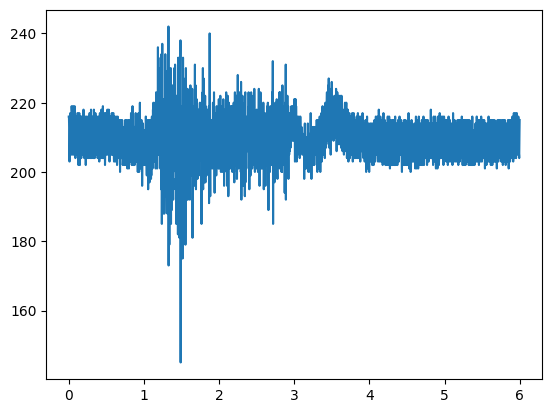

In [18]:
plt.plot(time_axis, baseline_data)

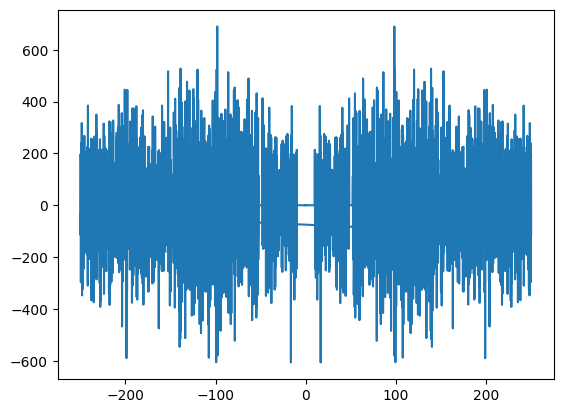

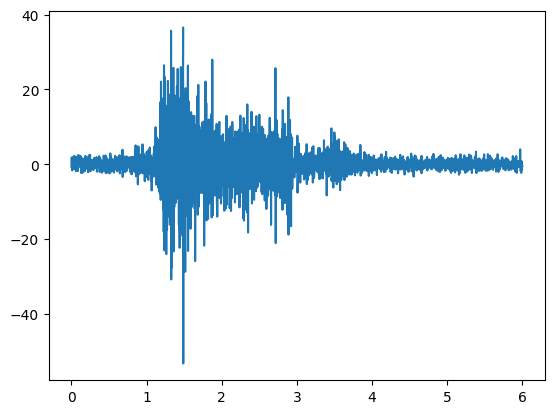

In [19]:
# compute the fft and bins
f_baseline = np.fft.fft(baseline_data-208.068)
bins = np.fft.fftfreq(time_axis.size, d=2e-3)
# remove all data outside thhe useful frequency range
# line below removes the noise from mains power at around 50 Hz
f_baseline[np.logical_and(abs(bins)>48,abs(bins)<52)] = 0
# low frequency stuff is not useful
f_baseline[abs(bins)<10] = 0
plt.plot(bins, f_baseline)
plt.show()
clear_noise = np.fft.ifft(f_baseline)
plt.plot(time_axis, clear_noise)


In [20]:
# Clean up all the data for environmental noise
# Put the data into the Data folder
data_files = os.listdir("Data")
time_axis = np.arange(0,6,2e-3)
for file in data_files:
    baseline_data = np.loadtxt(f"Data/{file}", dtype=float)
    # handle the short and long period of time
    # adjust the time bins if you run for longer or with different interval
    if len(baseline_data) == 3000:
        time_axis = np.arange(0,6,2e-3)
        bins = np.fft.rfftfreq(time_axis.size, d=2e-3)
    elif len(baseline_data) == 6000:
        time_axis = np.arange(0,12,2e-3)
        bins = np.fft.rfftfreq(time_axis.size, d=2e-3)
    f_baseline = np.fft.rfft(baseline_data)
    f_baseline[np.logical_and(abs(bins)>48,abs(bins)<52)] = 0
    f_baseline[abs(bins)<10] = 0
    clear_noise = np.fft.irfft(f_baseline)
    clear_noise = np.abs(clear_noise)
    np.savetxt(f"CleanData/{file}",clear_noise, delimiter="/n")
    

E2-Extend.csv


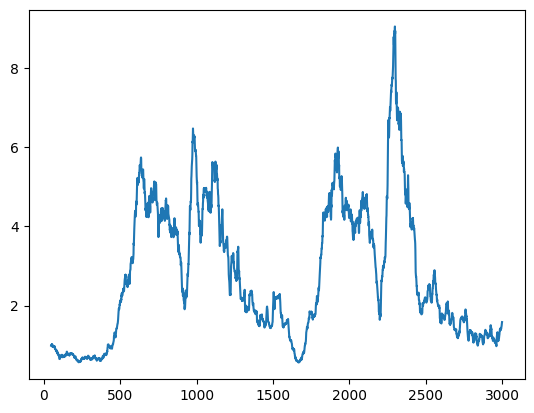

B1-Flex.csv


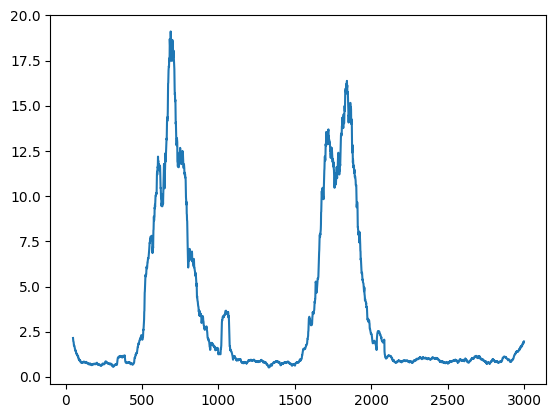

C1-WristFlex.csv


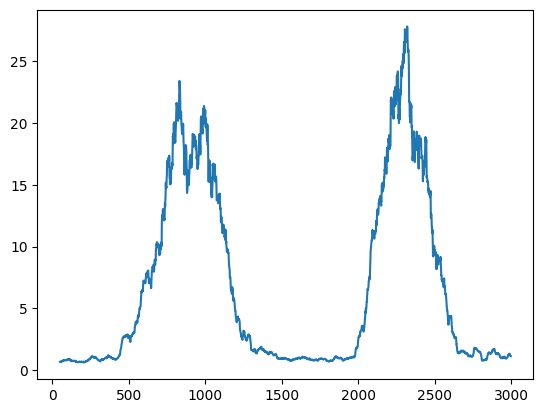

F2-Flex.csv


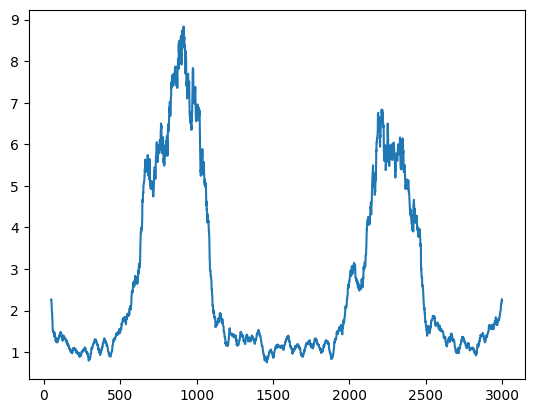

C0-Baseline.csv


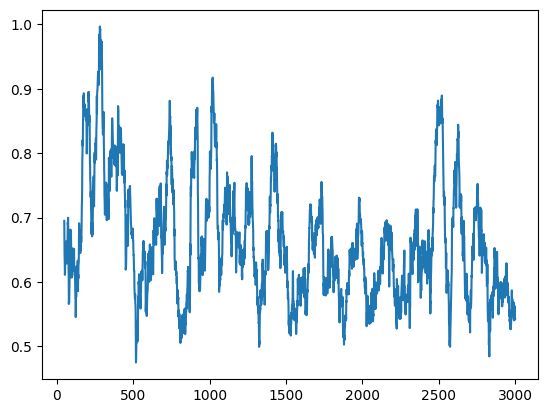

G0-Baseline.csv


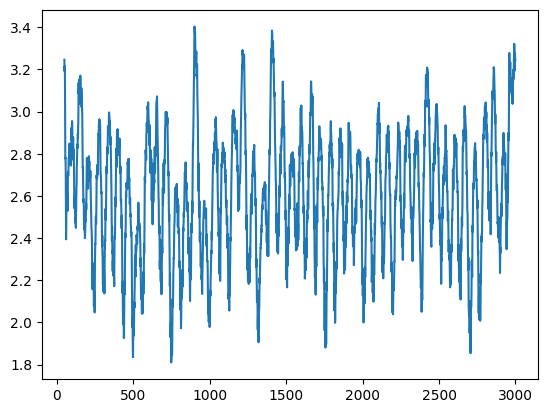

13.2-ThreeFingersInAndOut.csv


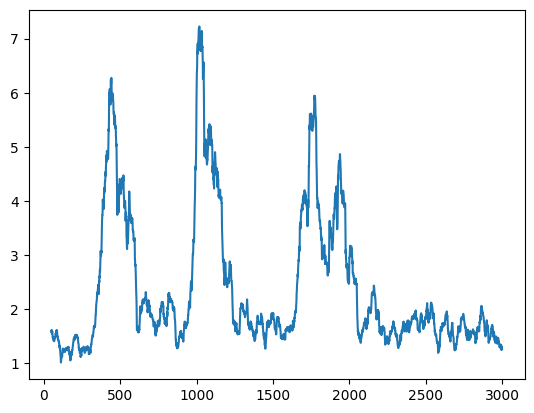

13.1-FingersIn.csv


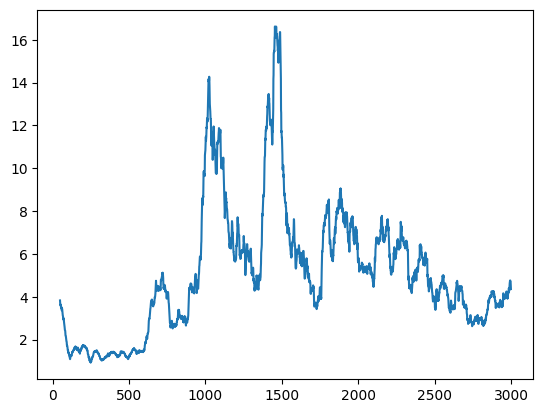

1-WristFlex.csv


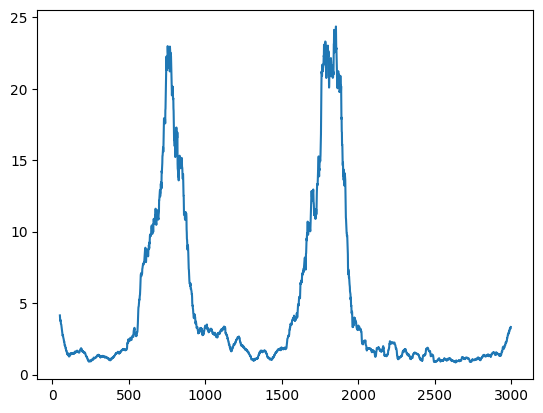

4-WristExtension.csv


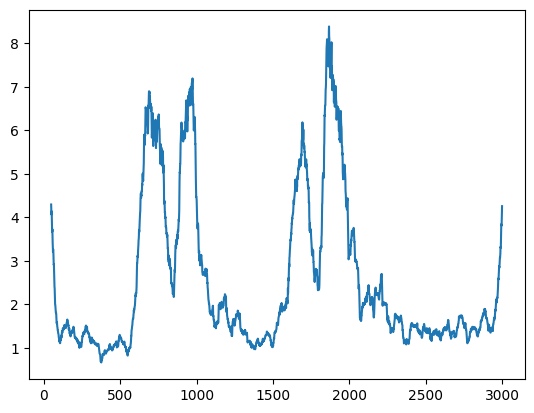

8-MiddleFingerCurl.csv


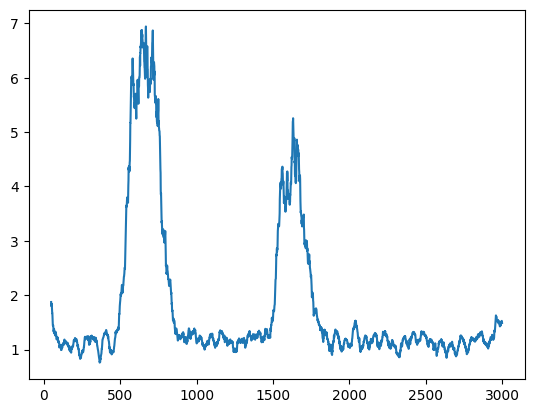

E4-Clench.csv


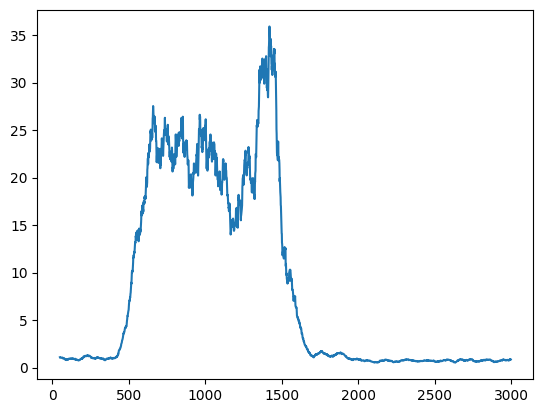

D1-Flex.csv


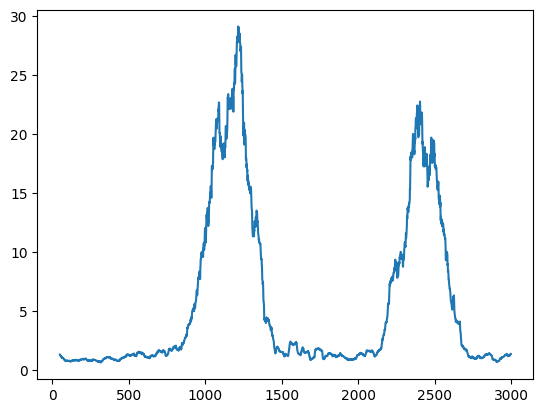

5-StrongWristExtension.csv


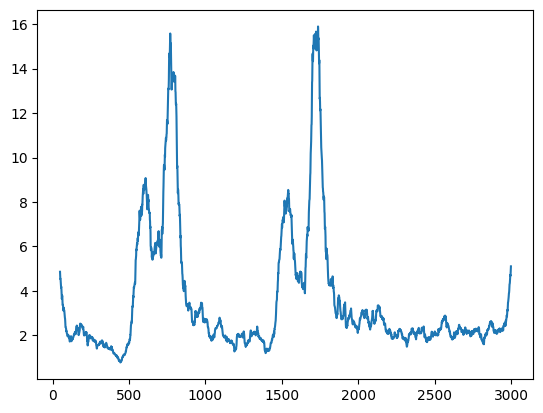

D0-Baseline.csv


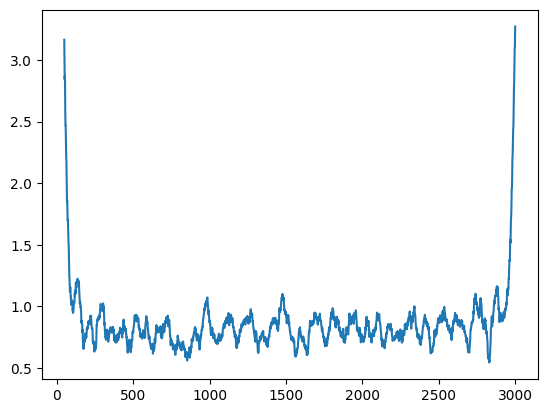

10-ThumbCurl.csv


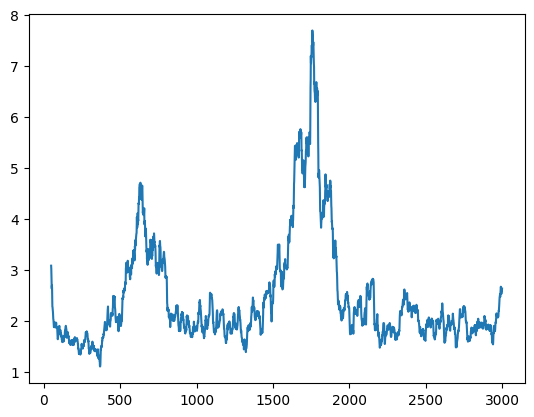

C4-StrongFistClenchAndRelax.csv


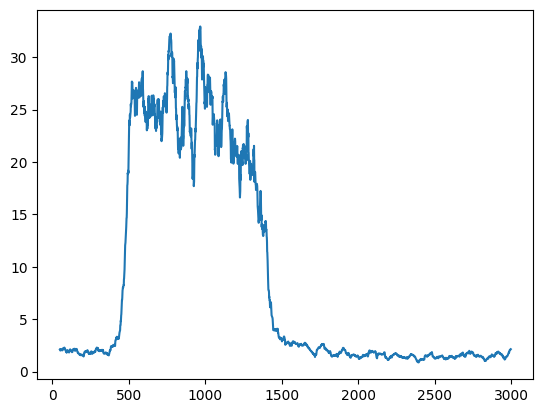

G3-Fingers.csv


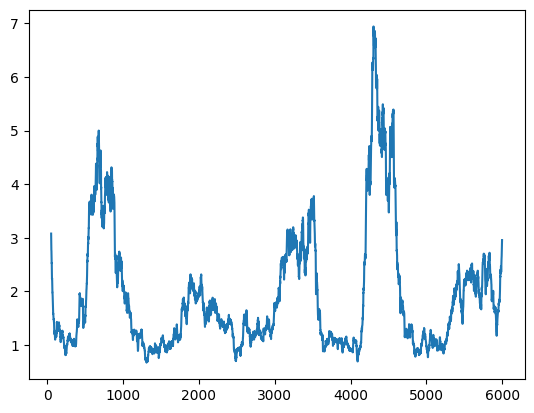

11.1-FistClenchAndRelax.csv


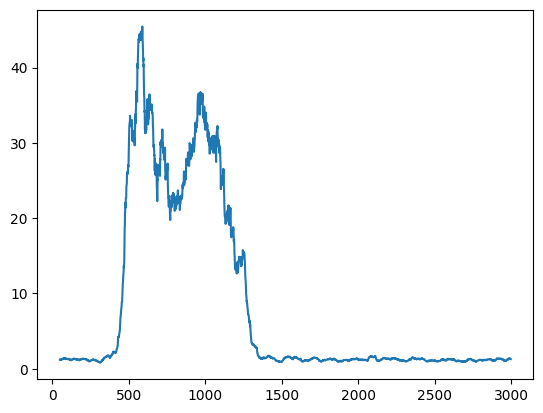

13-FingersInAndOut.csv


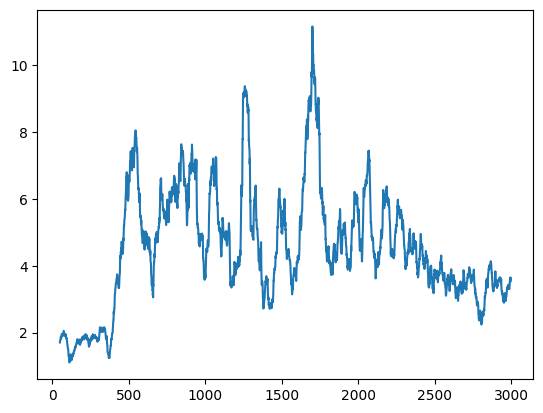

17-FingersInAndOutIndividually.csv


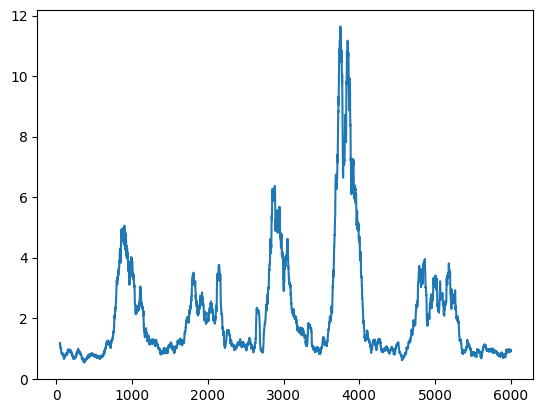

F4-Clench.csv


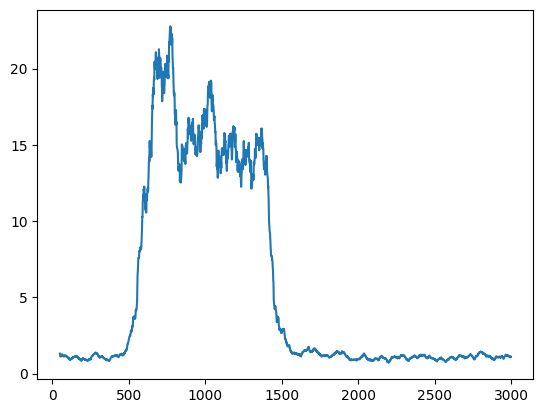

F3-Fingers.csv


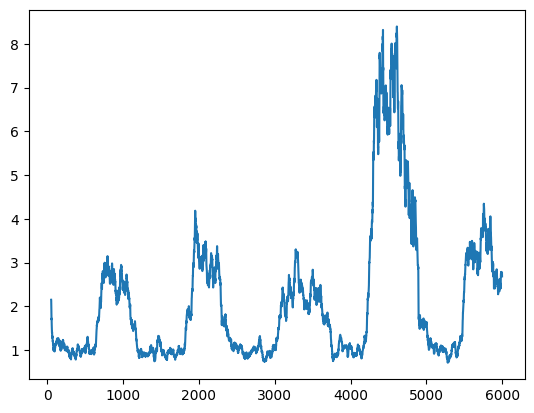

E1-Flex.csv


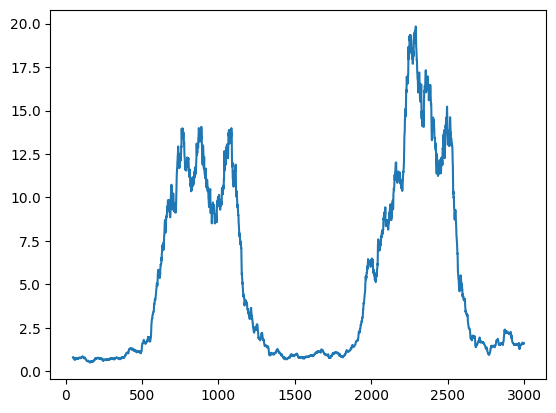

12-Pinkie.csv


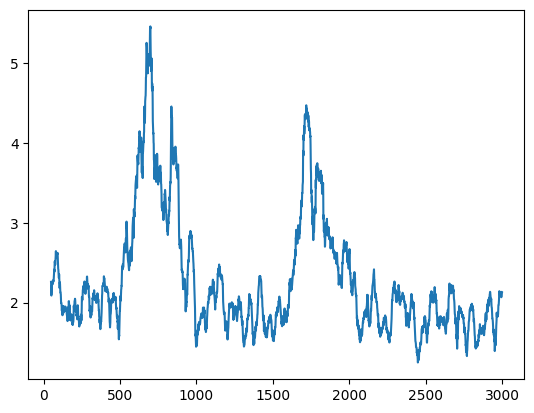

H1-Flex.csv


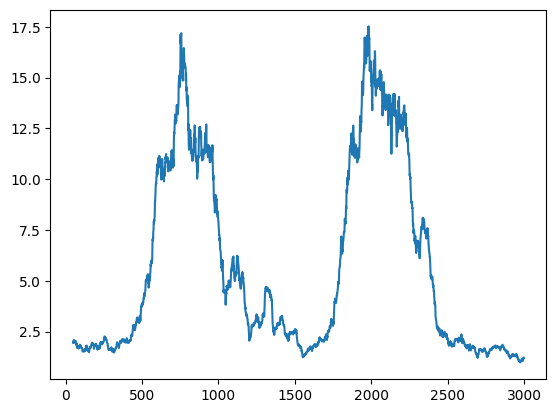

B2-WristExtension.csv


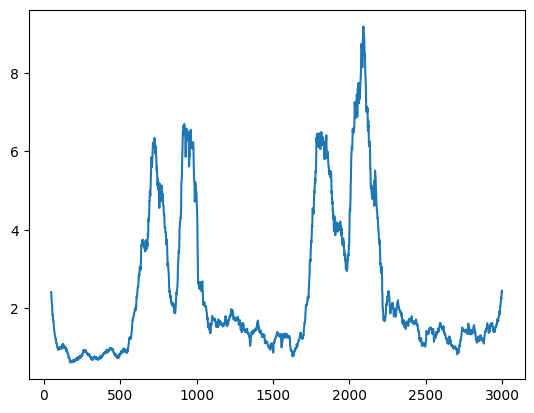

H0-Baseline.csv


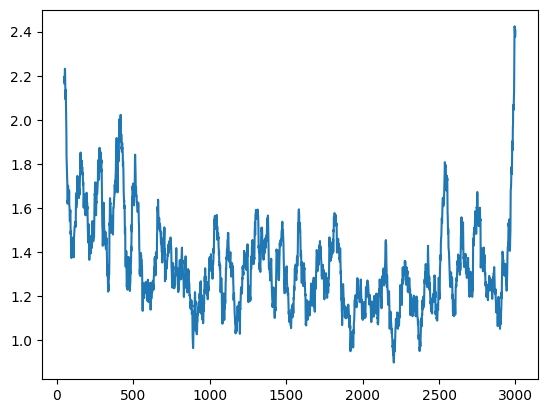

D3-Fingers.csv


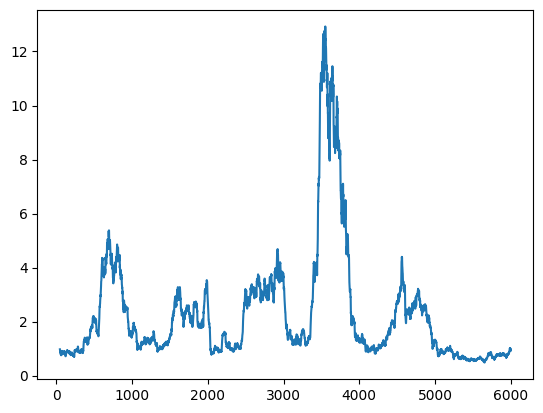

B4-FistClenchAndRelax.csv


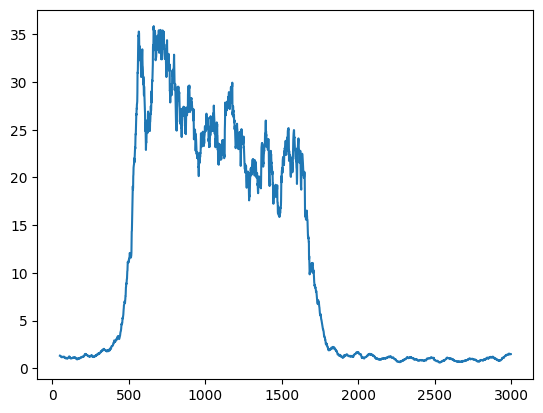

2-FastWristFlex.csv


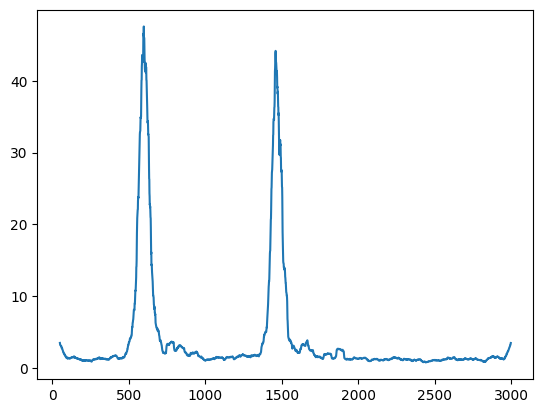

7-StrongFourFingerCurlSimultaneous.csv


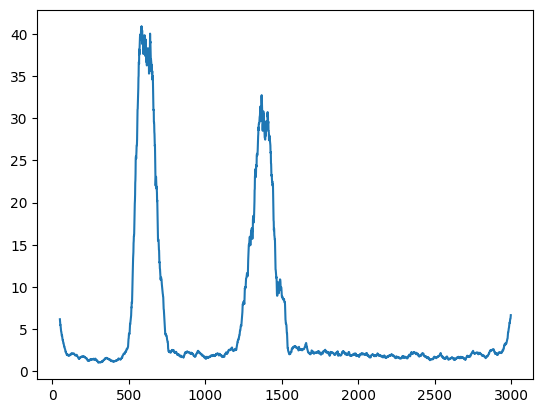

F1-Extend.csv


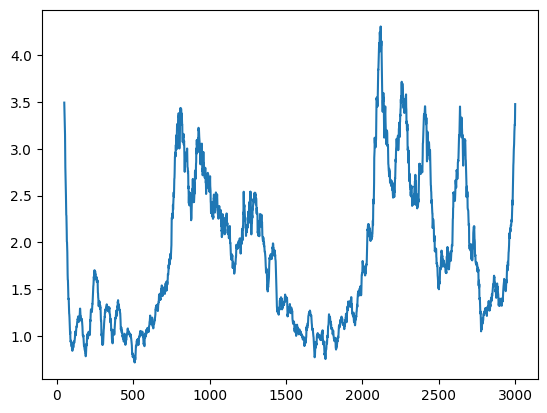

6-FourFingerCurlSimultaneous.csv


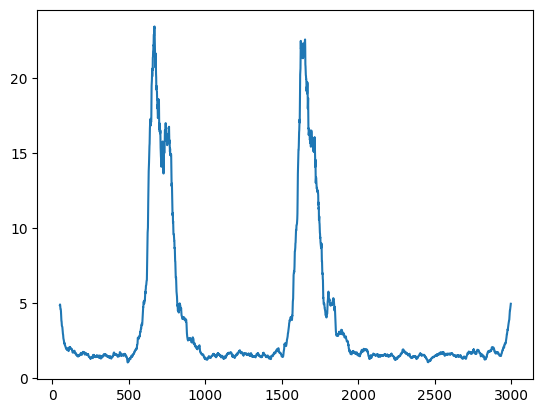

D4-Clench.csv


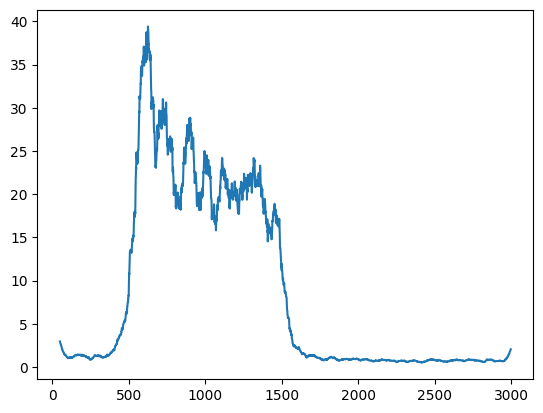

0-Baseline.csv


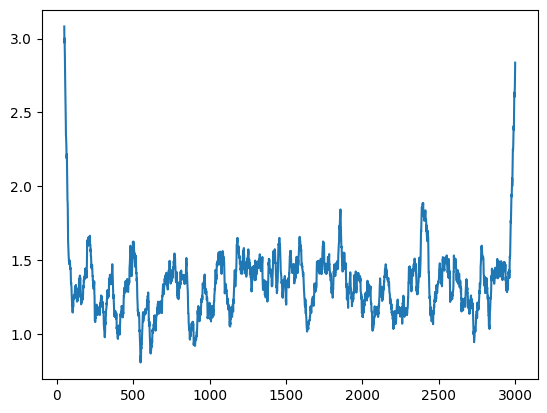

E3-Fingers.csv


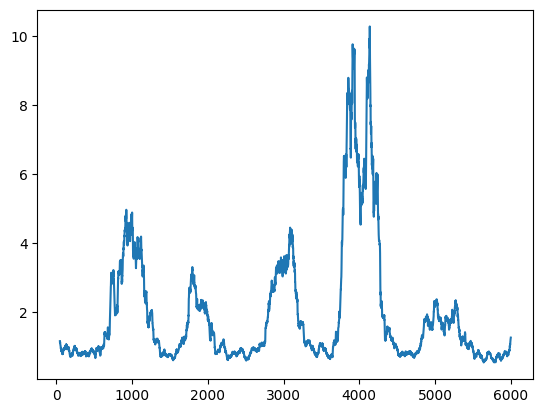

14-TwistHandOverAndBack.csv


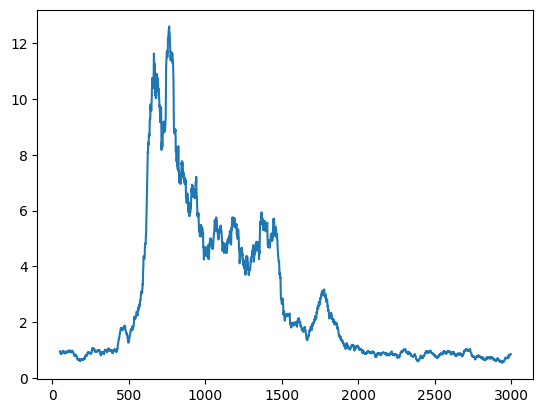

D2-Extend.csv


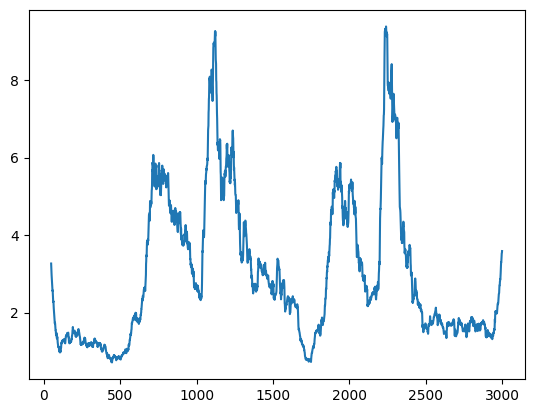

H4-Clench.csv


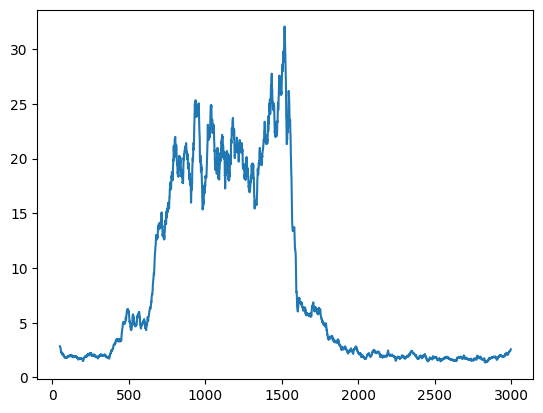

E0-Baseline.csv


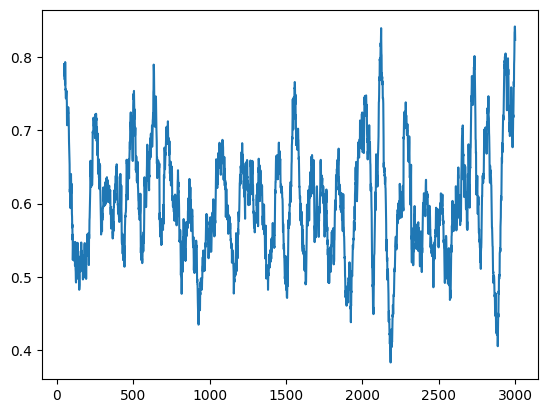

9-StrongMiddleFingerCurl.csv


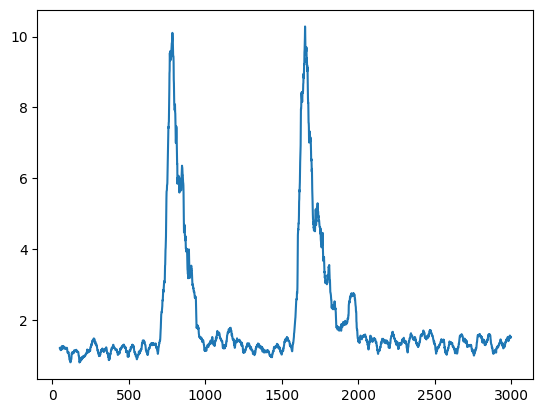

16-Curl.csv


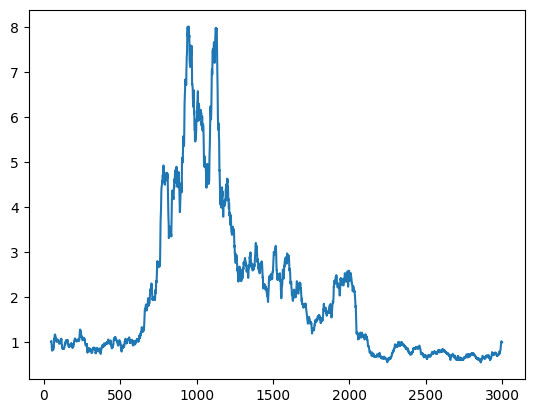

H3-Fingers.csv


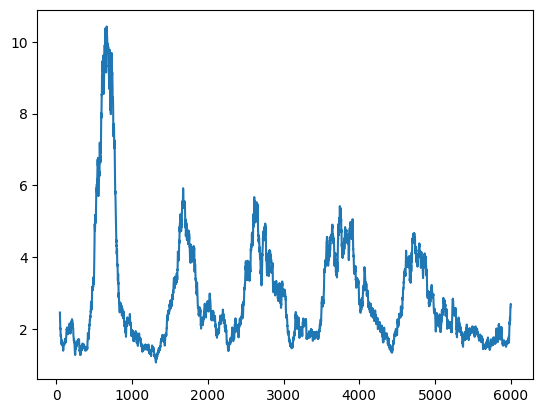

11-FistClench.csv


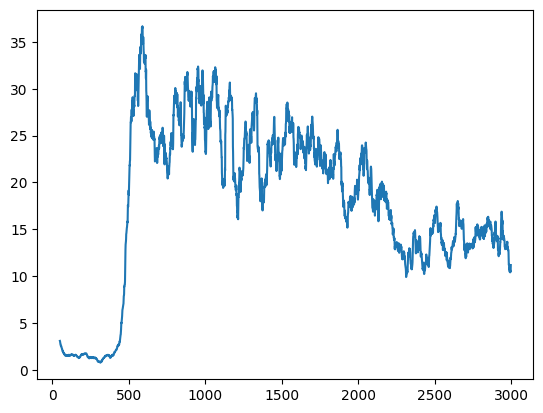

G1-Flex.csv


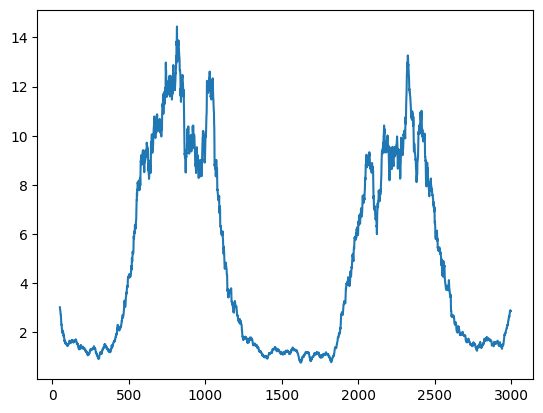

G4-Clench.csv


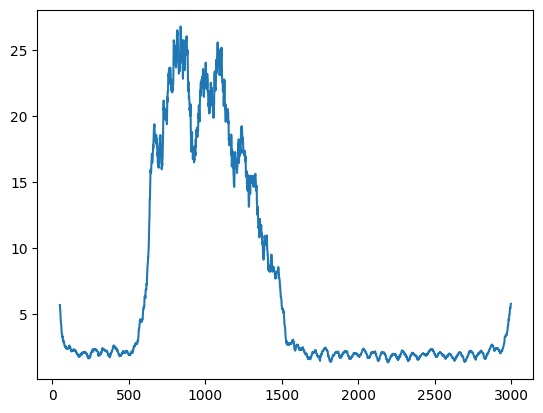

H2-Extension.csv


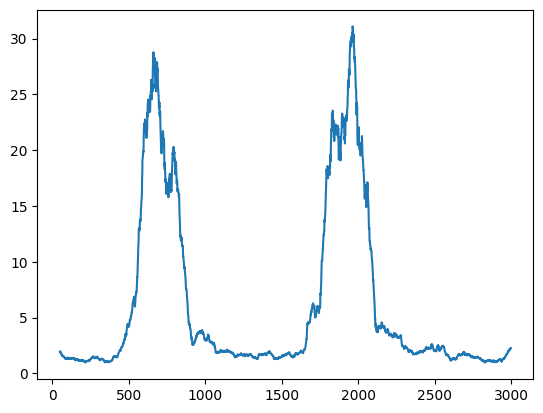

B3-IndiviualFingerThumbFirst.csv


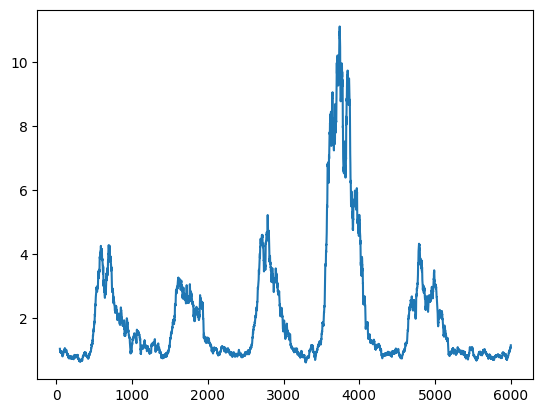

3-StrongWristFlex.csv


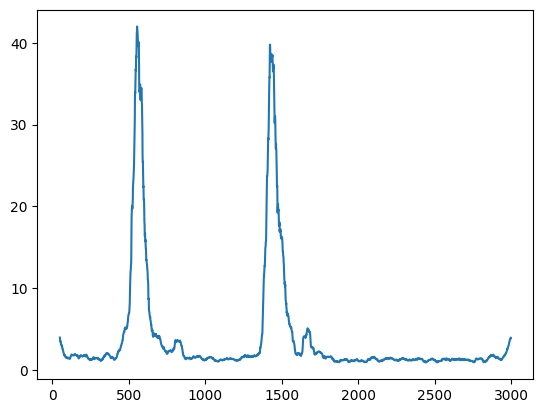

C2-WristExtend.csv


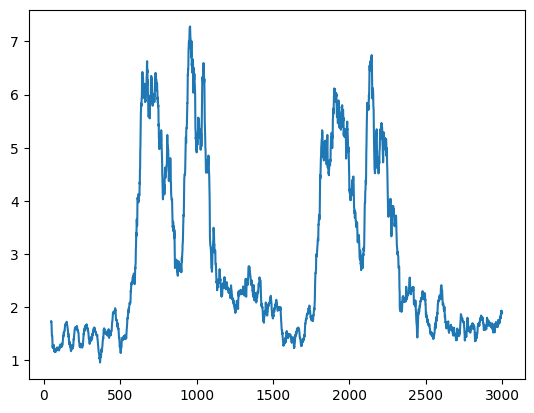

F0-Baseline.csv


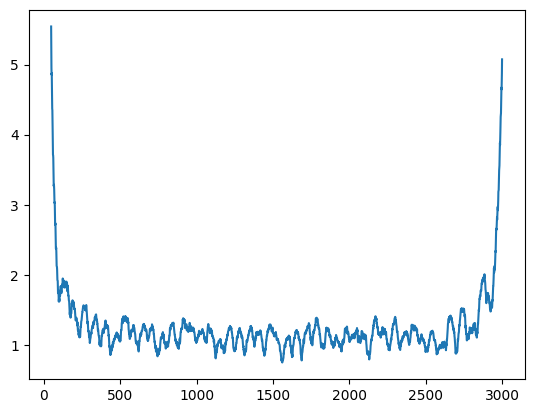

G2-Extension.csv


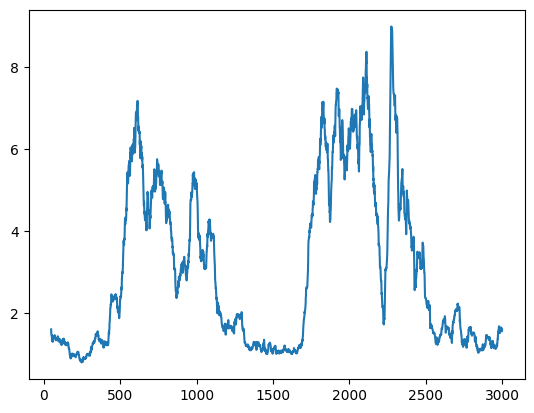

B0-Baseline.csv


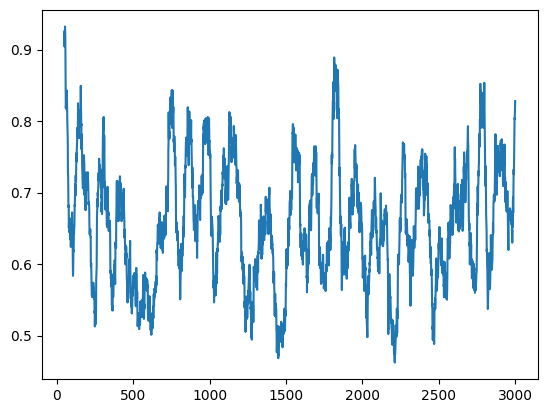

In [26]:
data_files = os.listdir("CleanData")
# this code is just useful to show smoothened data as it gives you a little bit more meaningful info
for file in data_files:
    data = np.loadtxt(f"CleanData/{file}", dtype=float)
    datas = pd.Series(data)
    smooth = datas.rolling(window=50).mean()
    print(file)
    plt.plot(smooth)
    plt.show()